In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pathlib import Path

ROOT_DIR = Path.cwd().absolute()
data_dir = Path(ROOT_DIR) / "data"

In [2]:
sifma_data = data_dir / "sifma" / "US-Equities-and-Related-Statistics-SIFMA.xlsx"

In [3]:
sifma_adv_usd = pd.read_excel(sifma_data, sheet_name="ADV $", skiprows=8, parse_dates=[0])
sifma_adv_usd = sifma_adv_usd.rename(columns={sifma_adv_usd.columns[0]: "date"})

In [4]:
sifma_adv_2022 = sifma_adv_usd.iloc[44:, :12]
sifma_adv_2022 = sifma_adv_2022.drop(columns=["Unnamed: 4", "Unnamed: 10"])
sifma_adv_2022 = sifma_adv_2022.set_index("date")

In [8]:
adv_mean_exchange_daily = sifma_adv_2022.iloc[:, 3:-1].mean() / 252
adv_mean_exchange_daily


ICE             0.467212
Nasdaq          0.456652
Cboe            0.292121
Other           0.153398
Off Exchange    0.864386
dtype: float64

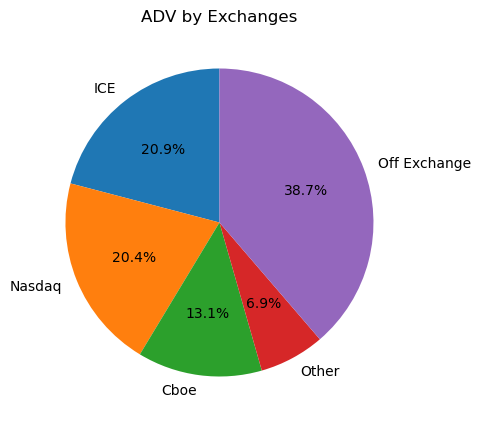

In [10]:
# Create a pie chart
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(adv_mean_exchange_daily, labels=adv_mean_exchange_daily.index, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("ADV by Exchanges")

# Show the chart
plt.show()

In [6]:
daily_vol_exc = pd.read_csv("data/cboe/market_history_2022.csv")

In [40]:
daily_notional = daily_vol_exc.pivot(index="Day", columns="Market Participant", values="Total Notional")
daily_notional.index = pd.to_datetime(daily_notional.index)
daily_notional["VIX"] = yf.Ticker("^VIX").history(start="2022-01-01", end="2022-12-31")["Close"].to_numpy()
daily_notional.tail()

Market Participant,BYX Equities (Y),BZX Equities (Z),EDGA Equities (J),EDGX Equities (K),FINRA / NYSE TRF (DN),FINRA / Nasdaq TRF Carteret (DQ),FINRA / Nasdaq TRF Chicago (DB),Investors Exchange (V),LTSE (L),MIAX Pearl (H),Members Exchange (U),NASDAQ (Q),NASDAQ BX (B),NASDAQ PSX (X),NYSE (N),NYSE American (A),NYSE Arca (P),NYSE Chicago (M),NYSE National (C),VIX
Day,,,,,,,,,,,,,,,,,,,,
2022-12-23,2.599124e+09,1.521855e+10,3.587094e+09,1.548293e+10,1.928290e+10,1.117488e+11,7.374066e+08,8.715727e+09,1.209591e+07,2.501726e+09,8.655985e+09,5.571145e+10,1.481189e+09,2.126696e+09,2.864292e+10,7.914696e+08,2.699998e+10,3.338320e+09,1.190825e+09,20.870001
2022-12-27,2.875965e+09,1.554920e+10,3.770103e+09,1.731953e+10,1.973744e+10,1.257143e+11,7.646654e+08,9.634762e+09,2.620448e+07,2.479754e+09,9.210587e+09,6.018599e+10,1.483801e+09,2.029863e+09,3.062512e+10,8.470536e+08,2.968876e+10,2.766629e+09,1.320974e+09,21.650000
2022-12-28,2.980250e+09,1.685392e+10,4.058997e+09,1.824477e+10,2.079067e+10,1.331133e+11,8.401171e+08,1.066359e+10,6.027777e+06,2.776800e+09,9.640240e+09,6.107435e+10,1.563574e+09,2.281178e+09,3.083419e+10,9.748110e+08,3.095582e+10,2.895315e+09,1.366362e+09,22.139999
2022-12-29,2.904968e+09,1.603484e+10,3.785083e+09,1.774316e+10,2.208981e+10,1.343403e+11,8.067662e+08,1.013816e+10,7.962931e+06,2.682960e+09,9.218642e+09,6.338545e+10,1.504627e+09,2.116688e+09,3.163963e+10,9.579781e+08,2.992675e+10,3.567125e+09,1.300281e+09,21.440001
2022-12-30,2.956199e+09,1.735070e+10,4.288771e+09,1.721353e+10,2.009450e+10,1.255265e+11,7.149194e+08,9.280007e+09,5.268240e+06,2.727086e+09,9.106345e+09,6.482773e+10,1.572040e+09,2.273069e+09,3.775108e+10,9.775198e+08,3.052839e+10,2.003450e+09,1.454217e+09,21.670000


Text(0.5, 1.0, 'Relative Volume by Exchange')

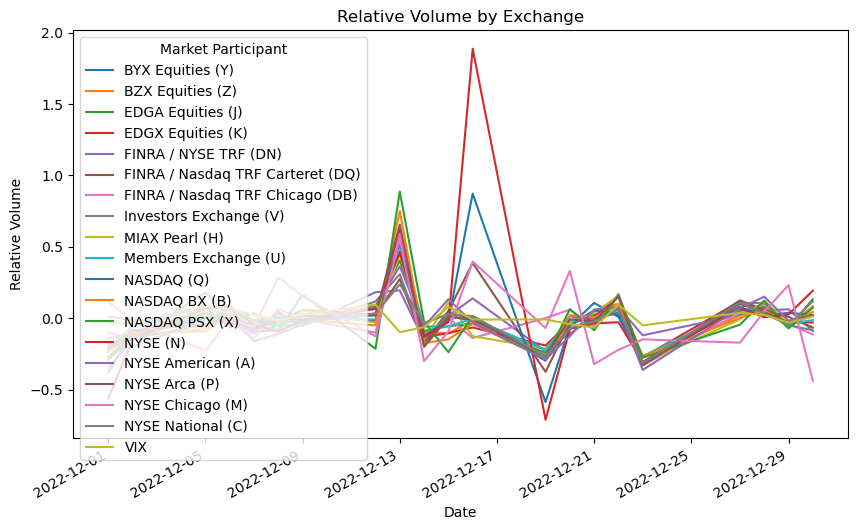

In [74]:
normalized_daily_vol = daily_notional.div(daily_notional.sum(axis=1), axis=0)
pct_change_daily_vol = daily_notional.pct_change()

# plot the normalized data
ax = pct_change_daily_vol[(pct_change_daily_vol.index > "2022-11-30") & (pct_change_daily_vol.index < "2023-01-01")].drop(["LTSE (L)"], axis=1).plot(kind='line', figsize=(10, 6))

# set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Relative Volume')
ax.set_title('Relative Volume by Exchange')

In [ ]:
sns.

### Odd Lots

In [72]:
sec_etp_stock = pd.read_csv("data/sec/metrics_by_exchange_q4_2022/etp_stock_timeseries3.csv")
sec_etp_stock["Date"] = pd.to_datetime(sec_etp_stock["Date"], format="%Y%m%d")
sec_etp_stock = sec_etp_stock.set_index("Date", drop=True)

sec_etp_stock_2022 = sec_etp_stock[sec_etp_stock.index > "2022-01-01"]
sec_etp_stock_2022.head()

,ETP Cancel-Trade Ratio,ETP Trade-Order Volume,ETP Hidden Rate,ETP Hidden Volume,ETP Oddlot Rate,ETP Oddlot Volume,Stock Cancel-Trade Ratio,Stock Trade-Order Volume,Stock Hidden Rate,Stock Hidden Volume,Stock Oddlot Rate,Stock Oddlot Volume
Date,,,,,,,,,,,,
2022-01-03,97.608925,0.280907,9.769067,11.108553,43.371241,8.185805,18.876764,2.849018,19.940533,16.914155,62.308921,18.231039
2022-01-04,92.306656,0.283582,9.682251,10.644530,46.347305,8.625901,17.448649,2.984300,20.534779,17.385943,63.622978,18.560488
2022-01-05,89.212866,0.283529,9.077012,10.533574,44.767597,8.566207,18.671005,2.742687,20.497163,17.421738,63.742198,19.086025
2022-01-06,103.420102,0.241307,8.801723,9.385691,44.419285,8.481987,21.771076,2.444411,21.329492,18.261518,62.915646,19.761489
2022-01-07,94.813057,0.266784,8.623625,10.348449,44.389143,8.380510,21.152375,2.419238,20.883126,18.118341,61.470203,18.950512


Text(0.5, 1.0, 'Relative Volume by Exchange')

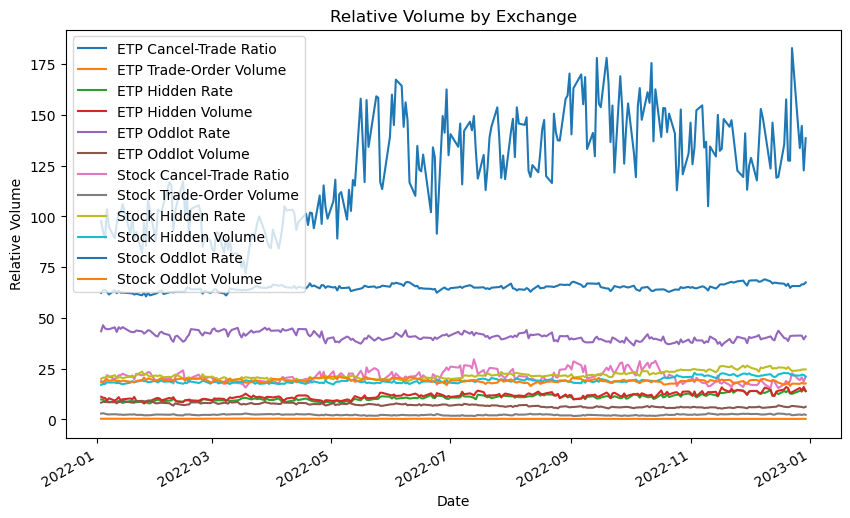

In [73]:
# plot the normalized data
ax = sec_etp_stock_2022.plot(kind='line', figsize=(10, 6))

# set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Relative Volume')
ax.set_title('Relative Volume by Exchange')